In [ ]:
!pip install blockdiag
!mkdir diag

In [189]:
from IPython.display import Image,SVG

# Abstracción con funciones

* Ámbitos de declaración
* Especificación de software
* Recursión
* Diseño descendente (*top-down*)

# Funciones en Python

* Elementos de la definición
  * Palabra reservada `def` y **nombre**
  * Parámetros formales
  * Cuerpo de la función
    * Sentencia `return`

In [1]:
def max(x, y):
    if x > y:
        return x
    return y

La palabra `def` es una palabra reservada que le dice a Python que se va a definir una función. El nombre (en este caso `max`) se usa para referirse a esta función.  La secuencia de nombres entre paréntesis (`x , y` en este ejemplo) son los parámetros formales de la función.

El cuerpo de la función es cualquier fragmento de código Python.  Además tenemos una sentencia especial, `return`, que solo puede usarse en el cuerpo de una función.  Como cualquier expresión, la expresión de llamada o invocación a una función también tiene un valor, que es devuelto con ayuda de `return`.

Por ejemplo `max(3,4)*max(3,2)` es 12 , porque la primera invocación de `max` devuelve 4 y la segunda devuelve 3.  Es importante recordar que `return` termina la invocación de la función.  Por ese motivo no es necesaria una cláusula `else` en este caso.

# Expresión de llamada

* Llamar, invocar, usar una función.

In [165]:
%%file diag/maxfn.svg
<svg width="250" height="120">
<rect x="0" y="0" width="100%" height="100%" fill="pink" stroke-width="0"/>
<text style="font-family: monospace; font-size: 150%;">
 <tspan dy="1em" x="5" >def max(x,y):</tspan>
 <tspan dy="1em" x="2em" >if x > y:</tspan>
 <tspan dy="1em" x="4em" >return x</tspan>
 <tspan dy="1em" x="2em" >return y</tspan>
</text>
</svg>

Overwriting diag/maxfn.svg


In [166]:
%%file diag/maxfncall.svg
<svg width="250" height="30">
<rect x="0" y="0" width="100%" height="100%" fill="pink" stroke-width="0"/>
<text style="font-family: monospace; font-size: 150%;">
 <tspan dy="1em" x="5" >max(3,4)</tspan>
</text>
</svg>

Overwriting diag/maxfncall.svg


In [209]:
%%file diag/fun-call.bd
blockdiag {
    default_fontsize = 18
    default_node_color = "orange"
    default_group_color = "lightgray"
    span_width = 80
    span_height = 25
    
    x,y,3,4 [width=20, height=30]
    x,y [style=none, color=lightyellow]
    fun [label="", background="diag/maxfn.png", color="pink", height=80, width=150]
    call [label="", background="diag/maxfncall.png", color=pink, height=80, width=150]

    group { color=white; group { label="Parámetros formales"; fontsize=14; orientation=portrait; x; y; }; fun; }
    group { color=white; group{ label="Marco de pila"; fontsize=14; orientation=portrait; 3; 4;}; call; }
    x -> 3 [style=dashed]; y -> 4 [style=dashed]
    x -> y [style=none]
    3 -> 4 [style=none]
    fun -> call [style=none]
}

Overwriting diag/fun-call.bd


In [210]:
!magick convert diag/maxfn.svg diag/maxfn.png
!magick convert diag/maxfncall.svg diag/maxfncall.png
!blockdiag -Tsvg -f C:/Windows/Fonts/consola.ttf diag/fun-call.bd

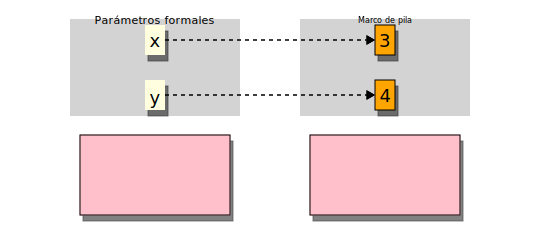

In [212]:
SVG("diag/fun-call.svg")

Cuando se llama a una función (se invoca, se llama), primero se evalúan las expresiones para construir los valores de los parámetros o argumentos. Entonces los parámetros formales se asocian a los parámetros reales que se le han pasado (que se han escrito entre paréntesis en la expresión de llamada). Este proceso de asociación es similar a la asignación.

Entonces el **punto de ejecución** (la instrucción siguiente a ejecutar) cambia a la primera instrucción del cuerpo de la función, y el código de la función se va ejecutando hasta que se encuentra una sentencia `return` o terminan las sentencias del cuerpo. Si se acaban las sentencias la función devuelve `None`. También ocurre lo mismo cuando no hay expresión después de `return`.

El valor retornado es el valor de la expresión de llamada.

Al terminar, el **punto de ejecución** se transfiere de nuevo al código que viene inmediatamente a continuación de la llamada.

# Abstracción lambda

* ¡`x` e `y` se refieren a `w` y `z`!

In [263]:
%%file diag/maxfncall2.svg
<svg width="250" height="120">
<rect x="0" y="0" width="100%" height="100%" fill="pink" stroke-width="0"/>
<text style="font-family: monospace; font-size: 150%;">
 <tspan dy="1em" x="5" >max(w,z)</tspan>
</text>
</svg>

Overwriting diag/maxfncall2.svg


In [264]:
%%file diag/lambda-abstr.bd
blockdiag {
    default_fontsize = 24
    default_node_color = "orange"
    default_group_color = "lightgray"
    
    fun [label="", background="diag/maxfn.png", height=120, width=250, color=pink]
    call [label="", background="diag/maxfncall2.png", height=120, width=250, color=pink]

    call -> fun [style=dashed]
}

Overwriting diag/lambda-abstr.bd


In [265]:
!magick convert diag/maxfncall2.svg diag/maxfncall2.png
!blockdiag -Tsvg -f C:\Windows\Fonts\Consola.ttf diag/lambda-abstr.bd

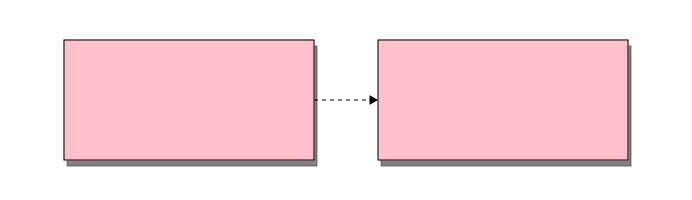

In [266]:
SVG("diag/lambda-abstr.svg")

Los parámetros proporcionan un concepto llamado **abstracción lambda**. Tiene que ver con que podemos escribir código que no se refiere a objetos específicos, sino que puede trabjar con cualquier objeto que se le pase como argumento.

# Argumentos por defecto


In [329]:
def impr_nombre(nombre, apellido, inverso = False):
    if inverso:
        print(apellido + ', ' + nombre)
    else:
        print(nombre, apellido)

In [330]:
impr_nombre('Francisco', 'Moya')
impr_nombre('Francisco', 'Moya', True)

Francisco Moya
Moya, Francisco


# Argumentos etiquetados


In [331]:
impr_nombre('Luis', 'Moya')
impr_nombre('Luis', 'Moya', 
            inverso = False)
impr_nombre('Luis', 
            apellido = 'Moya', 
            inverso = False)
impr_nombre(apellido = 'Moya', 
            nombre = 'Luis', 
            inverso = False)

Luis Moya
Luis Moya
Luis Moya
Luis Moya


# Ámbito (scope)

In [332]:
def f(x):
    y = 1
    x = x + y
    print('x =', x)
    return x
x = 3; y = 2
z = f(x)
print('z =', z)
print('x =', x)
print('y =', y)

x = 4
z = 4
x = 3
y = 2


En el nivel superior, fuera de cualquier función, el intérprete mantiene una tabla de símbolos con los nombres asignados a los objetos correspondientes.

Cuando se llama a una función se crea una nueva tabla de símbolos (se llama normalmente **marco de pila**). Esta tabla mantiene los símbolos definidos dentro de la función, incluidos los parámetros formales.  Si desde esta función se llama a otra, se crea una nueva tabla de símbolos y así sucesivamente.

Cuando una función termina la tabla de símbolos correspondiente deja de existir. En Python se puede saber el ámbito de una variable simplemente mirando al texto del programa. Ésto se conoce como ámbitos léxicos o estáticos.


# Ámbitos anidados (nested scopes)

In [337]:
def f(x):
    def g():
        x = 'abc'
        print('x =',x)
    def h():
        z = x
        print('z =',z)
    x = x + 1
    print('x =',x)
    h()
    g()
    print('x =', x)
    return g
x = 3
z = f(x)
print('x =', x)
print('z =', z)
z()

x = 4
z = 4
x = abc
x = 4
x = 3
z = <function f.<locals>.g at 0x000001A3D273F048>
x = abc


# Ejemplo

* ¿Qué imprime?

In [ ]:
def f():
    print(x)
def g():
    print(x)
    x = 1
x = 3
f()
x = 3
g()

La asignación de x en la función g hace que el símbolo x se considere un nombre local de g.  Por tanto su uso antes de la asignación se considera un error.  El mismo código que en f no genera ningún problema, porque se refiere a la variable global x, en g es un error porque se refiere a la variable local x que aún no ha sido asignada.

# Docstrings


In [339]:
def f(x):
    'Devuelve el cuadrado de x'
    return x**2

In [342]:
help(f)

Help on function f in module __main__:

f(x)
    Devuelve el cuadrado de x



# Documentando software


In [339]:
def findRoot(x, power, epsilon):
    if x < 0 and power%2 == 0:
        return None
    low = min(-1.0, x)
    high = max(1.0, x)
    ans = (high + low)/2.0
    while abs(ans**power - x) >= epsilon:
        if ans**power < x:
            low = ans
        else:
            high = ans
        ans = (high + low)/2.0
    return ans

# Documentando software

* **Asume...** Suposiciones, precondiciones.
* **Devuelve...** Garantías, postcondiciones.


In [344]:
def findRoot(x, power, epsilon):
    ''' Asume x, epsilon son int o float, power es int, epsilon > 0, power >= 1
        Devuelve un float y tal que y**power está a menos de epsilon de x.
        Si no existe ese float devuelve None '''
    
    if x < 0 and power%2 == 0:
        return None
    low = min(-1.0, x)
    high = max(1.0, x)
    ans = (high + low)/2.0
    while abs(ans**power - x) >= epsilon:
        if ans**power < x:
            low = ans
        else:
            high = ans
        ans = (high + low)/2.0
    return ans

Una especificación de una función define un contrato entre el que la implementa y los que escriben programas que van a usarla (los clientes). Este contrato tiene dos partes: Los supuestos iniciales que se asumen en la implementación de la función y las garantías que ofrece.

Los supuestos son habitualmente restricciones en el tipo y los valores de los argumentos, como en la primera línea de la doctring. Las garantías describen las condiciones que debe cumplir la propia función.

# Descomposición y abstracción

* **Descomposición** crea estructura
    * Problema dividido
    * Posibilidad de reuso
* **Abstracción** oculta detalle
    * Información relevante disponible
    * Información irrelevante se olvida

Las funciones permiten crear objetos computacionales complejos que se comportan como primitivas. Esto lo consiguen proporcionando un mecanismo para descomponer y abstraer.

La descomposición crea estructura. Permite romper el problema en subproblemas que son razonablemente auto-contenidos y que podrían reutilizarse en otros contextos.

La abstracción oculta detalle haciendo ver el código como una caja negra. Es decir, algo cuyo interior no puede verse, ni se tiene que ver, ni debe verse.  La esencia de la programación es preservar la información relevante en cada contexto mientras se oculta la no relevante. La clave es encontrar la relación de relevancia que es apropiada tanto para los clientes como para el creador de la abstracción. En esto consiste el arte de programar de manera efectiva.

# Pruebas unitarias

In [345]:
def testFindRoot():
    epsilon = 0.0001
    for x in (0.25, -0.25, 2, -2):
        for power in range(1, 4):
            print('Testing x = ' + str(x) + \
             ' and power = ' + str(power))
            result = findRoot(x, power, epsilon)
            if result == None:
                print('  No root')
            else:
                print('  ', result**power, '~=', x)

In [ ]:
testFindRoot()

# Pruebas unitarias con unittest

In [365]:
import unittest

epsilon = 0.000001
class TestFindRoot(unittest.TestCase):
    
    def testTipicos(self):
        self.compruebaValoresRaices((0.25, 2), (1, 2, 3))
        self.compruebaValoresRaices((-0.25, -2), (1, 3))

    def testNegativos(self):
        self.compruebaValoresRaicesNone((-0.25, -2), (2,))
        
    def compruebaValoresRaices(self, valores, raices):
        for x in valores:
            self.compruebaRaices(x, raices)

    def compruebaValoresRaicesNone(self, valores, raices):
        for x in valores:
            self.compruebaRaicesNone(x, raices)

    def compruebaRaices(self, x, raices):
        for power in raices:
            self.assertAlmostEqual(findRoot(x, power, epsilon)**power, x, places=5)

    def compruebaRaicesNone(self, x, raices):
        for power in raices:
            self.assertEqual(findRoot(x, power, epsilon), None)        

# Pruebas unitarias con unittest (runner)

* Busca todas las pruebas (clases derivadas de `unittest.TestCase`)
* Ejecuta todas las pruebas (funciones que empiezan por `test`)

In [367]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


# Función recursiva

* Caso base
* Recurrencia o caso inductivo

In [368]:
def fib(n):
    '''Asume n int, n >= 0
       Devuelve n-simo término de sucesión de Fibonacci (int)''' 
    if n < 2:
        return 1
    return fib(n-1) + fib(n-2)

Las funciones recursivas son una forma natural de expresar las definiciones inductivas, en las que se define algún caso base y el valor n-simo en función de algún otro anterior.

Son muy sencillas de entender, pero a veces pueden no ser nada eficientes.  Por ejemplo ¿cuántas veces se calcula fib(2) cuando llamamos a fib(5)?

Una función recursiva no tiene nada de particular respecto al caso de una función que llama a otra función, pero evidentemente para que termine alguna vez tiene que tener dos partes:

* Uno o varios casos base, en los que el resultado se puede obtener directamente.
* Una recurrencia, o caso inductivo, o caso recursivo, en los que el resultado se determina en función de los resultados para casos más cercanos a los casos base.

# Ejercicio

* Factorial de un número
    * Recursivo e iterativo


In [369]:
def fact(n):
    if n < 1: return 1
    return n * fact(n-1)

def fact_i(n):
    ret = 1
    for i in range(2,n+1):
        ret *= i
    return ret

# Cadenas de texto
## Subcadenas

In [381]:
s = u'abcdefghijklmnñopqrstuvwxyz'

s[:5]

'abcde'

In [378]:
s[5:10]

'fghij'

In [379]:
s[10:]

'klmnñopqrstuvwxyz'

In [380]:
s[-5:]

'vwxyz'

# Ejercicio

* Definir `es_palindromo(s)` que devuelve `True` si la cadena `s` es palíndromo.


In [6]:
es_palindromo('dabalearrozalazorraelabad')

True

In [4]:
def es_palindromo(s):
    if len(s) < 2:
        return True
    return s[0] == s[-1] and es_palindromo(s[1:-1])

# Módulos


In [8]:
%%file lab1.py
def my_email():
    return 'francisco.moya@uclm.es'

Writing lab1.py


In [9]:
from lab1 import *
my_email()

'francisco.moya@uclm.es'

In [10]:
import lab1
lab1.my_email()

'francisco.moya@uclm.es'

In [11]:
import lab1 as x
x.my_email()

'francisco.moya@uclm.es'